# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [22]:
# Instalação de bibliotecas básicas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [4]:
# Responda aqui a primeira etapa
file_path = '/content/matches.csv'
matches = pd.read_csv(file_path)

print(f"\nPrimeiras 5 linhas do dataset:")
display(matches.head())


Primeiras 5 linhas do dataset:


,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [ ]:
print(f"\nO dataset possui Linhas x Colunas: {matches.shape}")


O dataset possui Linhas x Colunas: (1389, 28)


In [ ]:
print("\nTipos de dados das colunas:")
print(matches.dtypes)


Tipos de dados das colunas:
Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object


In [ ]:
print("\nQuantidade de valores null em cada coluna:")
print(matches.isnull().sum())


Valores null em cada coluna:
Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       696
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               1
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64


Estatísticas básicas:


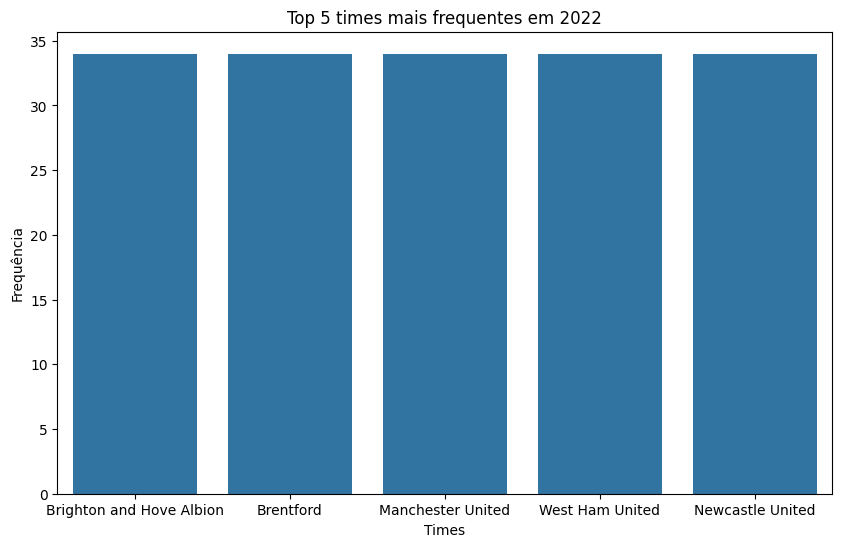

In [ ]:
#Estatísticas básicas
matches_2022 = matches[matches['season'] == 2022]

top_teams = matches_2022['team'].value_counts().nlargest(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_teams.index, y=top_teams.values)
plt.title('Top 5 times mais frequentes em 2022')
plt.xlabel('Times')
plt.ylabel('Frequência')
plt.show()

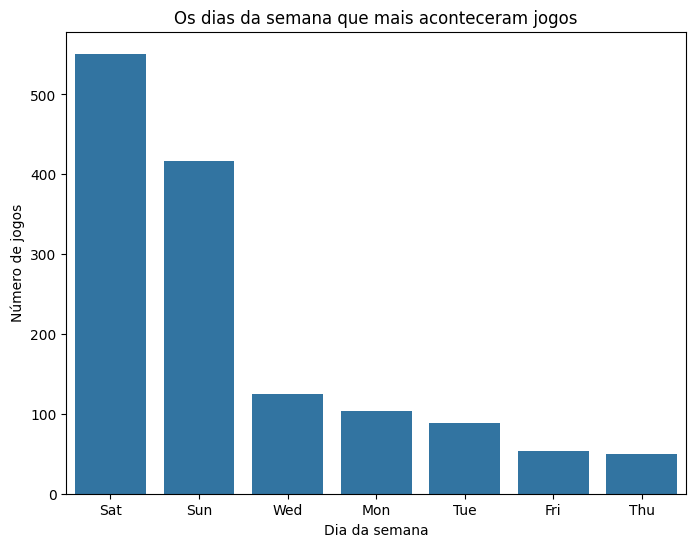

In [ ]:
# Estatísticas básicas: Dias da semana com mais jogos
games_per_day = matches['day'].value_counts()

top_3_days = games_per_day.nlargest(7)

plt.figure(figsize=(8,6))
sns.barplot(x=top_3_days.index, y=top_3_days.values)
plt.title('Os dias da semana que mais aconteceram jogos')
plt.xlabel('Dia da semana')
plt.ylabel('Número de jogos')
plt.show()

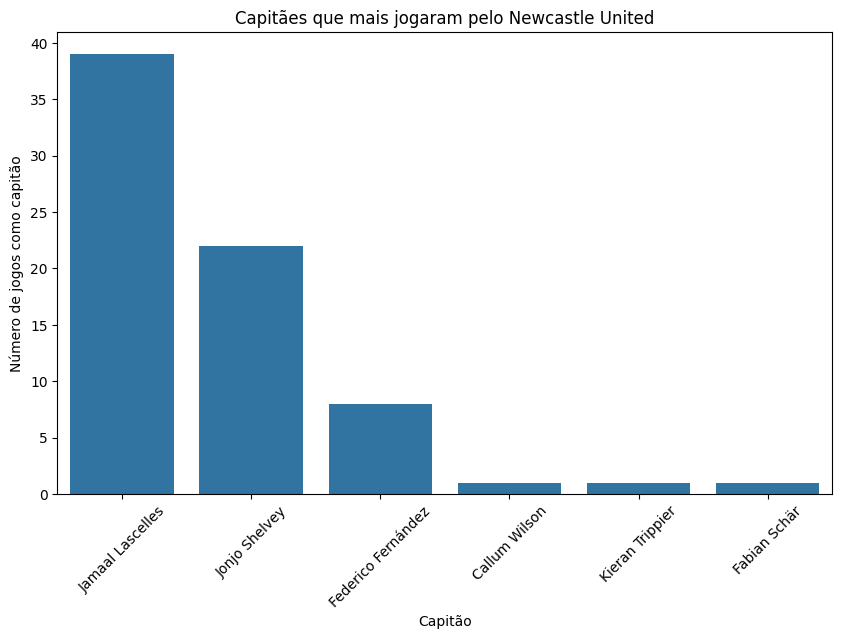

In [ ]:
# Estatísticas básicas: Jogador que foi mais vezes capitão do Newcastle em 2021 e 2022
newcastle_matches = matches[matches['team'] == 'Newcastle United']

captain_count = newcastle_matches['captain'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=captain_count.index, y=captain_count.values)
plt.title('Capitães que mais jogaram pelo Newcastle United')
plt.xlabel('Capitão')
plt.ylabel('Número de jogos como capitão')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

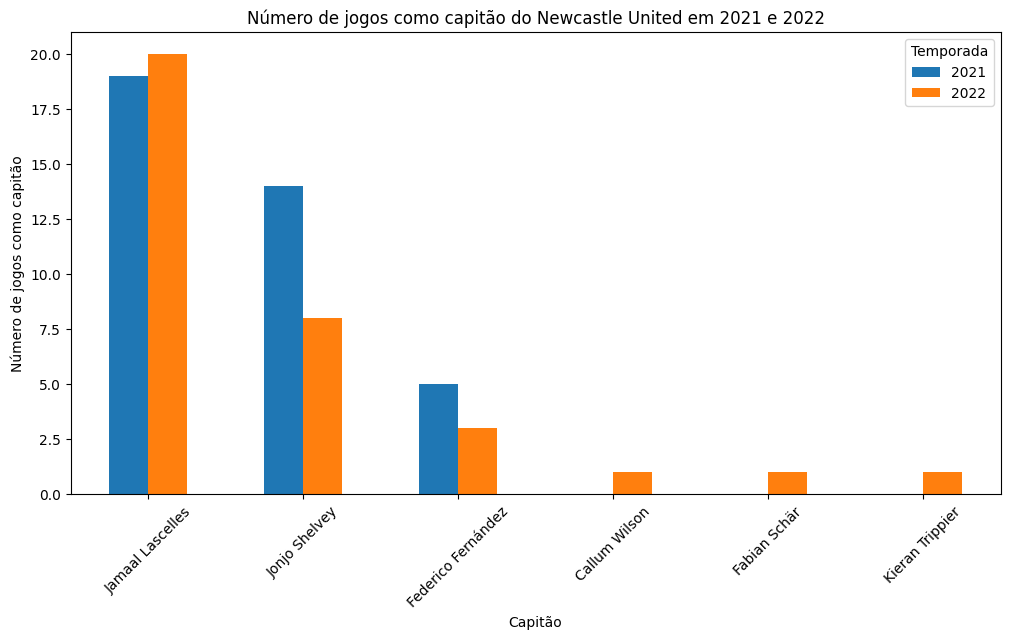

In [ ]:
# Estatísticas básicas: Jogadores que foram mais vezes capitães do Newcastle. Comparativo de 2021 com 2022

newcastle_df = matches[matches['team'] == 'Newcastle United']

newcastle_2021_2022 = newcastle_df[newcastle_df['season'].isin([2021, 2022])]

captain_counts = newcastle_2021_2022.groupby(['season', 'captain']).size().unstack(fill_value=0)

captains_df = captain_counts.T

captains_df = captains_df.assign(Total=captains_df.sum(axis=1))
captains_df = captains_df.sort_values(by='Total', ascending=False).drop(columns='Total')

plt.figure(figsize=(12,6))
captains_df.plot(kind='bar', figsize=(12,6))
plt.title('Número de jogos como capitão do Newcastle United em 2021 e 2022')
plt.xlabel('Capitão')
plt.ylabel('Número de jogos como capitão')
plt.xticks(rotation=45)
plt.legend(title='Temporada')
plt.show()

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

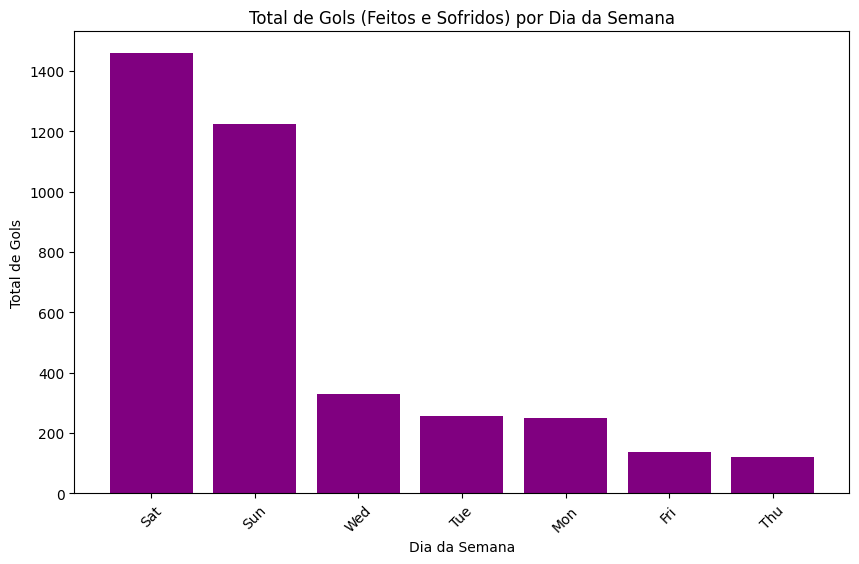

In [ ]:
# Numero total de gols por dia da semana (sem equalização)
matches['gf'] = matches['gf'].astype(int)
matches['ga'] = matches['ga'].astype(int)

matches['total_gols'] = matches['gf'] + matches['ga']

df_aggregated = matches.groupby('day')['total_gols'].sum().reset_index()

df_aggregated = df_aggregated.sort_values(by='total_gols', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_aggregated['day'], df_aggregated['total_gols'], color='purple')

plt.xlabel('Dia da Semana')
plt.ylabel('Total de Gols')
plt.title('Total de Gols (Feitos e Sofridos) por Dia da Semana')

plt.xticks(rotation=45)
plt.show()

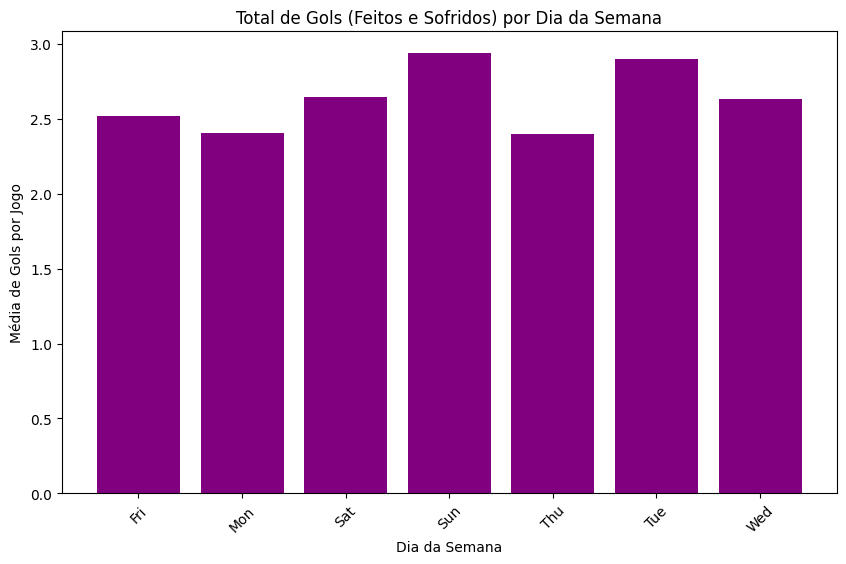

In [ ]:
# Numero total de gols por dia da semana (equalizado)
matches['gf'] = matches['gf'].astype(int)
matches['ga'] = matches['ga'].astype(int)

matches['total_gols'] = matches['gf'] + matches['ga']

games_per_day = matches['day'].value_counts()

total_goals_per_day = matches.groupby('day')['total_gols'].sum()

average_goals_per_game = total_goals_per_day / games_per_day

plt.figure(figsize=(10, 6))
plt.bar(average_goals_per_game.index, average_goals_per_game, color='purple')

plt.xlabel('Dia da Semana')
plt.ylabel('Média de Gols por Jogo')
plt.title('Total de Gols (Feitos e Sofridos) por Dia da Semana')

plt.xticks(rotation=45)
plt.show()

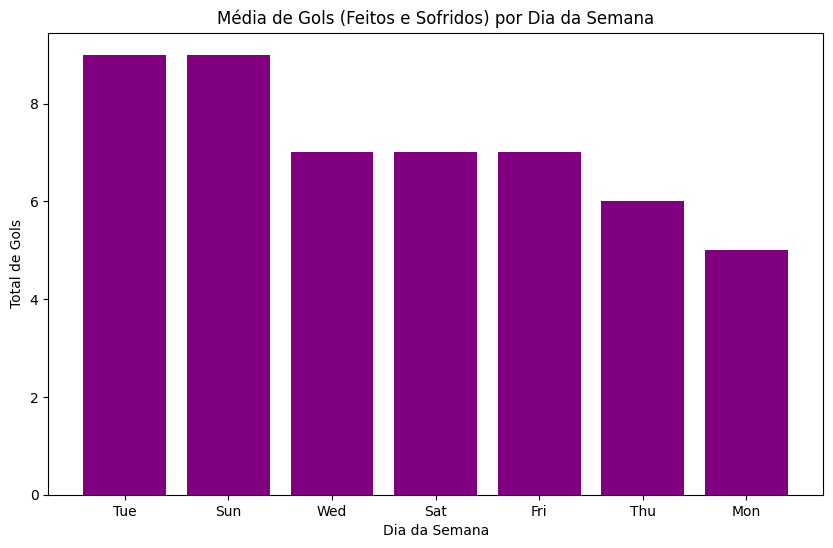

In [ ]:
# Média de gols por dia da semana (sem equalização)
matches['total_gols'] = matches['gf'] + matches['ga']

df_sorted = matches.sort_values(by='total_gols', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['day'], df_sorted['total_gols'], color='purple')

plt.xlabel('Dia da Semana')
plt.ylabel('Total de Gols')
plt.title('Média de Gols (Feitos e Sofridos) por Dia da Semana')

plt.show()

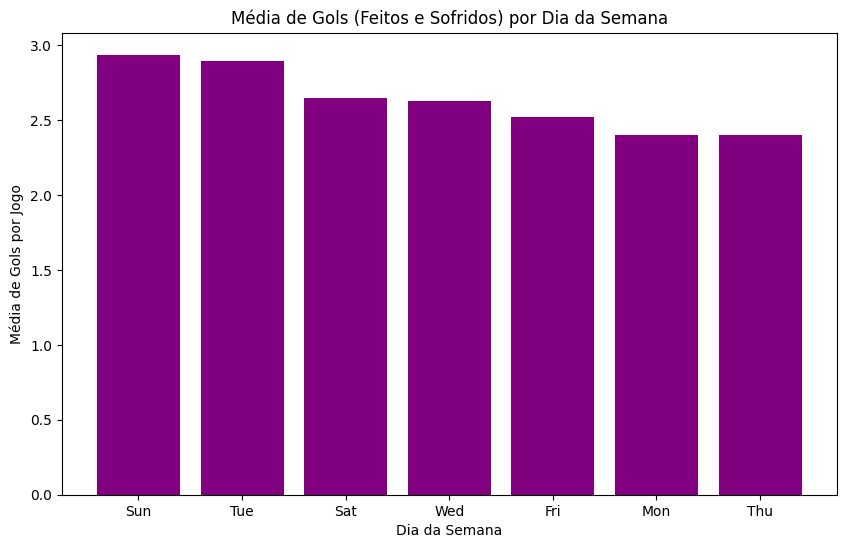

In [ ]:
# Média de gols por dia da semana (equalizado)

matches['total_gols'] = matches['gf'] + matches['ga']
matches['num_jogos'] = 1

daily_stats = matches.groupby('day').agg({
    'total_gols': 'sum',
    'num_jogos': 'sum'
}).reset_index()

daily_stats['media_gols_por_jogo'] = daily_stats['total_gols'] / daily_stats['num_jogos']

df_sorted = daily_stats.sort_values(by='media_gols_por_jogo', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted['day'], df_sorted['media_gols_por_jogo'], color='purple')

plt.xlabel('Dia da Semana')
plt.ylabel('Média de Gols por Jogo')
plt.title('Média de Gols (Feitos e Sofridos) por Dia da Semana')

plt.show()

## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

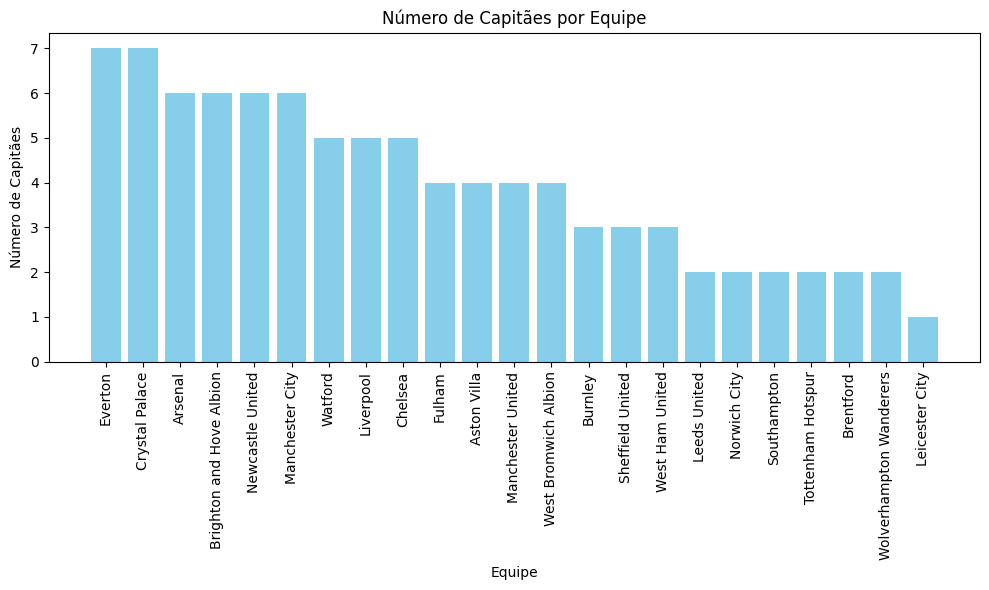

In [ ]:
unique_captains_per_team = matches.groupby('team')['captain'].nunique().reset_index()

unique_captains_per_team.columns = ['team', 'unique_captains_count']

unique_captains_per_team = unique_captains_per_team.sort_values(by='unique_captains_count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(unique_captains_per_team['team'], unique_captains_per_team['unique_captains_count'], color='skyblue')
plt.xlabel('Equipe')
plt.ylabel('Número de Capitães')
plt.title('Número de Capitães por Equipe')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

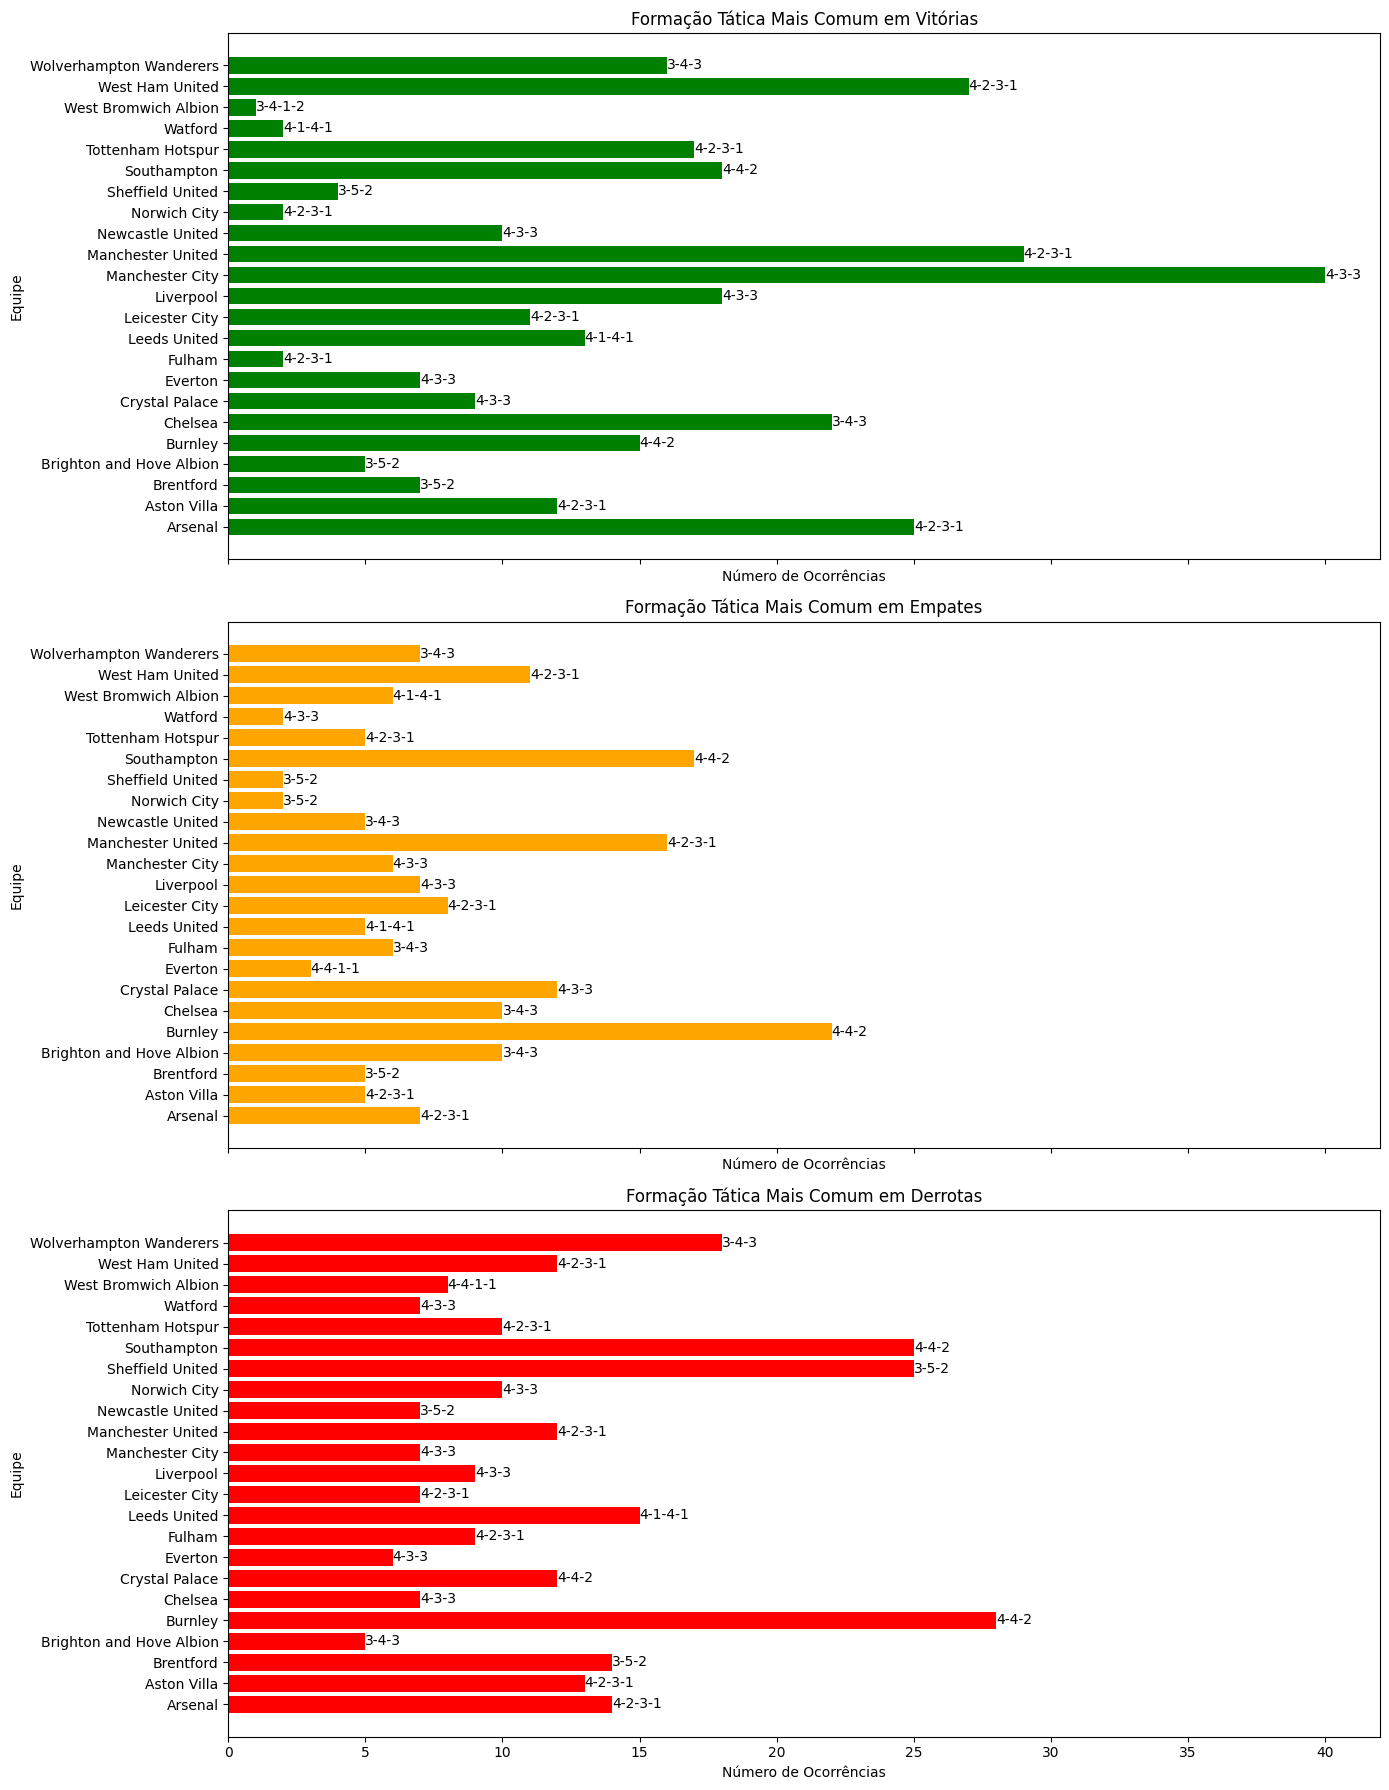

In [ ]:
df_win = matches[matches['result'] == 'W']
df_draw = matches[matches['result'] == 'D']
df_loss = matches[matches['result'] == 'L']

formation_win = df_win.groupby(['team', 'formation']).size().reset_index(name='count')
formation_draw = df_draw.groupby(['team', 'formation']).size().reset_index(name='count')
formation_loss = df_loss.groupby(['team', 'formation']).size().reset_index(name='count')

most_common_win = formation_win.loc[formation_win.groupby('team')['count'].idxmax()]
most_common_draw = formation_draw.loc[formation_draw.groupby('team')['count'].idxmax()]
most_common_loss = formation_loss.loc[formation_loss.groupby('team')['count'].idxmax()]

fig, axs = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Gráfico de vitórias
axs[0].barh(most_common_win['team'], most_common_win['count'], color='green')
for index, value in enumerate(most_common_win['count']):
    axs[0].text(value, index, most_common_win['formation'].iloc[index], va='center', ha='left', fontsize=10, color='black')
axs[0].set_title('Formação Tática Mais Comum em Vitórias')
axs[0].set_xlabel('Número de Ocorrências')
axs[0].set_ylabel('Equipe')

# Gráfico de empates
axs[1].barh(most_common_draw['team'], most_common_draw['count'], color='orange')
for index, value in enumerate(most_common_draw['count']):
    axs[1].text(value, index, most_common_draw['formation'].iloc[index], va='center', ha='left', fontsize=10, color='black')
axs[1].set_title('Formação Tática Mais Comum em Empates')
axs[1].set_xlabel('Número de Ocorrências')
axs[1].set_ylabel('Equipe')

# Gráfico de derrotas
axs[2].barh(most_common_loss['team'], most_common_loss['count'], color='red')
for index, value in enumerate(most_common_loss['count']):
    axs[2].text(value, index, most_common_loss['formation'].iloc[index], va='center', ha='left', fontsize=10, color='black')
axs[2].set_title('Formação Tática Mais Comum em Derrotas')
axs[2].set_xlabel('Número de Ocorrências')
axs[2].set_ylabel('Equipe')

plt.tight_layout()

plt.show()

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

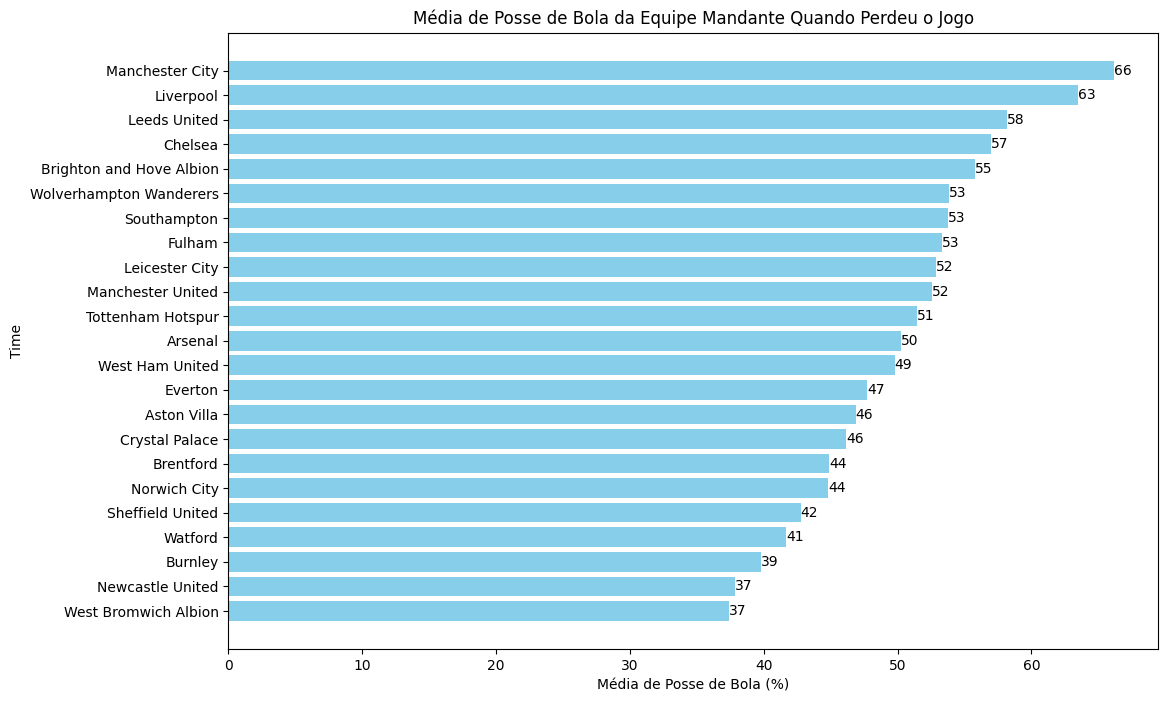

In [ ]:
df_filtered = matches[(matches['venue'] == 'Home') & (matches['result'] == 'L')]

average_possession = df_filtered.groupby('team')['poss'].mean().reset_index()

average_possession = average_possession.sort_values(by='poss', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.barh(average_possession['team'], average_possession['poss'], color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}',
             va='center', ha='left', color='black', fontsize=10)

plt.xlabel('Média de Posse de Bola (%)')
plt.ylabel('Time')
plt.title('Média de Posse de Bola da Equipe Mandante Quando Perdeu o Jogo')
plt.gca().invert_yaxis()
plt.show()

## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [ ]:
matches['points'] = matches.apply(lambda row: 3 if row['result'] == 'W' else (1 if row['result'] == 'D' else 0), axis=1)

team_points = matches.groupby('team')['points'].sum().reset_index()

team_points = team_points.sort_values(by='points', ascending=False).reset_index(drop=True)
team_points.index += 1

def generate_team_logo_url(team_name):
    search_name = team_name.lower().replace(' ', '-')
    return f"https://logodetimes.com/times/{search_name}-football-club/{search_name}-football-club-4096.png"

team_points['logo'] = team_points['team'].apply(generate_team_logo_url)

table = team_points.rename(columns={'team': 'Nome', 'points': 'Pontos'})
table.index.name = 'Posição'

def display_table_with_images(df):
    html = '<table border="1" style=" width: 100%;"><tr><th>Posição</th><th>Logo</th><th>Nome</th><th>Pontos</th></tr>'
    for index, row in df.iterrows():
        html += f'''
        <tr>
            <td>{index}</td>
            <td><img src="{row['logo']}" alt="Logo" width="80" height="80"></td>
            <td>{row['Nome']}</td>
            <td>{row['Pontos']}</td>
        </tr>
        '''
    html += '</table>'
    display(HTML(html))

display_table_with_images(table)


Posição,Logo,Nome,Pontos
1,,Manchester City,166
2,,Chelsea,132
3,,Manchester United,128
4,,Arsenal,121
5,,Tottenham Hotspur,120
6,,West Ham United,117
7,,Leicester City,108
8,,Wolverhampton Wanderers,94
9,,Leeds United,93
10,,Aston Villa,92


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [14]:
# Público: Público total de cada equipe
matches['attendance'] = pd.to_numeric(matches['attendance'], errors='coerce')

matches = matches.dropna(subset=['attendance'])

total_attendance_by_team = matches.groupby('team')['attendance'].sum().reset_index()
total_attendance_by_team = total_attendance_by_team.sort_values(by='attendance', ascending=False)

fig = px.bar(total_attendance_by_team,
             x='team',
             y='attendance',
             title='Público Total por Equipe',
             labels={'attendance':'Público Total', 'team':'Equipe'},
             hover_data=['attendance'])

fig.update_layout(xaxis_tickangle=-90, height=600, width=1000)

fig.show()

In [21]:
# Público: Público detalhado por jogos
# Cada time possui um gráfico, implementei um filtro para ver cada um dos gráficos especificamente.

matches['attendance'] = pd.to_numeric(matches['attendance'], errors='coerce')
matches = matches.dropna(subset=['attendance'])
matches['date'] = matches['date'].astype(str)
teams = matches['team'].unique()

app = Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='team-dropdown',
        options=[{'label': team, 'value': team} for team in teams],
        value=teams[0]
    ),
    dcc.Graph(id='team-graph')
])

@app.callback(
    Output('team-graph', 'figure'),
    Input('team-dropdown', 'value')
)
def update_graph(selected_team):
    team_data = matches[matches['team'] == selected_team]
    fig = px.bar(team_data,
                 x='date',
                 y='attendance',
                 color='opponent',
                 title=f'Público por Jogo para {selected_team}',
                 labels={'attendance':'Público', 'date':'Data'},
                 hover_data=['venue'])
    fig.update_layout(xaxis_type='category', xaxis_tickangle=-45, height=500, width=800)
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>